## Observations and Insights 

In [159]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from functools import reduce
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [160]:
# Checking the number of mice.
mouse_count=mouse_data_complete['Mouse ID'].value_counts()
mouse_count

g989    13
l471    10
o287    10
m546    10
j755    10
        ..
n482     1
v199     1
h428     1
f932     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [161]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Generate series to identify duplicate rows
duplicates=mouse_data_complete.duplicated()

#Find index of duplicate row
duplicate_mouse=duplicates.loc[(duplicates == True)].index

#Find mouse ID of duplicate row
duplicate_row=mouse_data_complete.loc[duplicate_mouse]
duplicate_ID=duplicate_row.iloc[0]['Mouse ID']

In [162]:
# Optional: Get all the data for the duplicate mouse ID. 
#Print data from Mouse ID with duplicate row
mouse_data_complete.loc[(mouse_data_complete['Mouse ID'] == duplicate_ID)]

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [163]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_cleaned = mouse_data_complete[mouse_data_complete['Mouse ID'] != duplicate_ID]

In [164]:
# Checking the number of mice in the clean DataFrame.
mouse_count_cleaned=mouse_data_cleaned['Mouse ID'].value_counts()
mouse_count_cleaned

l471    10
s710    10
j755    10
g791    10
k862    10
        ..
n482     1
v199     1
h428     1
f932     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [179]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_groups=mouse_data_cleaned.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = (regimen_groups['Tumor Volume (mm3)'].mean()).rename("Mean")
tumor_median= (regimen_groups['Tumor Volume (mm3)'].median()).rename("Median")
tumor_variance= (regimen_groups['Tumor Volume (mm3)'].var()).rename("Variance")
tumor_stdv= (regimen_groups['Tumor Volume (mm3)'].std()).rename("Standard Deviation")
tumor_SEM= (regimen_groups['Tumor Volume (mm3)'].sem()).rename("SEM")

# Assemble the resulting series into a single summary dataframe.
drug_summary_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), [tumor_mean, tumor_median, tumor_variance,
                                                           tumor_stdv, tumor_SEM])
#drug_summary
drug_summary_merged

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [193]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary2=mouse_data_cleaned.groupby(['Drug Regimen'],as_index=False).agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
drug_summary2

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.320930  50.446266  43.852013  6.622085  0.544332
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

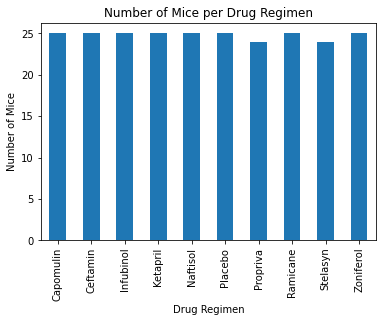

In [220]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Generate regimen groups with unique counts for mice
mouse_groups =regimen_groups['Mouse ID'].unique()

#Create a series with names of drug regimen
regimen_names=list(drug_summary2['Drug Regimen'])

#create a series that has 10 values, one for each number of unique mice
regimen_counts=[]
for index in range(len(mouse_groups)):
    regimen_counts+=[len(mouse_groups[index])]

#Set x_axis
x_axis=np.arange(len(regimen_counts))

#Generate bar chart
regimen_df = pd.DataFrame({'Drug Regimen':regimen_names, 'Number of Mice':regimen_counts})
regimen_bar = regimen_df.plot.bar(x='Drug Regimen', y='Number of Mice', rot=90, title="Number of Mice per Drug Regimen", legend=False)
regimen_bar.set_ylabel("Number of Mice")

Text(0, 0.5, 'Number of Mice')

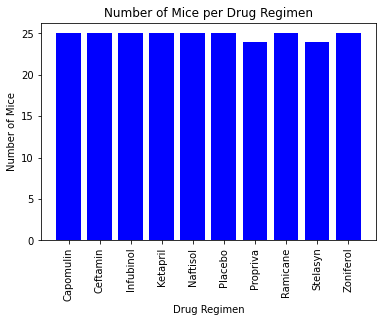

In [218]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(x_axis, regimen_counts, color="b", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_names, rotation="vertical")

# Give chart labels and a tile
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [228]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group=mouse_data_cleaned.groupby('Sex')
sex_counts = (sex_group['Mouse ID'].count()).rename("Count")
sex_counts

Sex
Female    922
Male      958
Name: Count, dtype: int64

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
